In [2]:
!pip install opencv-python

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
#Load flowers dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it



In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/17078576150_6f272ce73f_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4042180234_64cd2859c9_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/7205698252_b972087cc2.jpg'),
 PosixPath('datasets/flower_photos/tulips/17994129033_bbd0acba62_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14009216519_b608321cf2_n.jpg')]

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]


[PosixPath('datasets/flower_photos/roses/8125886145_ae99f91fd0.jpg'),
 PosixPath('datasets/flower_photos/roses/3104672186_5f75647448_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6309548569_932fee8313_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1461381091_aaaa663bbe_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3903276582_fe05bf84c7_n.jpg')]

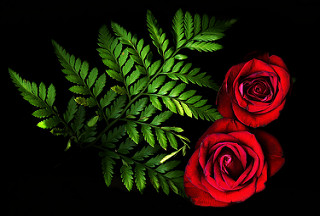

In [10]:
PIL.Image.open(str(roses[1]))

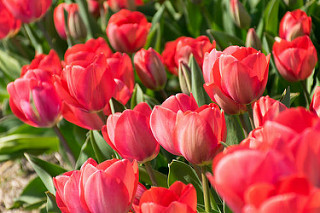

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [12]:
#Read flowers images from disk into numpy array using opencv
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}



In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [14]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/8125886145_ae99f91fd0.jpg'),
 PosixPath('datasets/flower_photos/roses/3104672186_5f75647448_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6309548569_932fee8313_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1461381091_aaaa663bbe_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3903276582_fe05bf84c7_n.jpg')]

In [15]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/8125886145_ae99f91fd0.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[12, 24,  6],
        [11, 22,  6],
        [11, 22,  6],
        ...,
        [27, 47, 18],
        [28, 46, 17],
        [27, 45, 16]],

       [[13, 24,  8],
        [12, 23,  7],
        [13, 23,  7],
        ...,
        [28, 49, 16],
        [29, 47, 16],
        [28, 46, 17]],

       [[16, 26, 10],
        [15, 25,  9],
        [14, 24,  8],
        ...,
        [29, 50, 17],
        [29, 47, 16],
        [28, 46, 17]],

       ...,

       [[27, 31, 19],
        [27, 31, 19],
        [25, 29, 17],
        ...,
        [ 5, 14,  4],
        [ 5, 14,  4],
        [ 5, 14,  4]],

       [[26, 31, 16],
        [27, 32, 17],
        [25, 30, 15],
        ...,
        [ 5, 14,  4],
        [ 5, 14,  4],
        [ 5, 15,  3]],

       [[26, 31, 16],
        [28, 33, 18],
        [26, 31, 16],
        ...,
        [ 6, 15,  5],
        [ 5, 15,  3],
        [ 5, 15,  3]]], dtype=uint8)

In [17]:
img.shape

(333, 500, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [20]:
X = np.array(X)
y = np.array(y)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)        

2022-01-20 16:29:08.904893: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-20 16:29:08.905159: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tabinda-Inspiron-3542): /proc/driver/nvidia/version does not exist
2022-01-20 16:29:09.072190: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.evaluate(X_test_scaled,y_test)


In [ ]:
predictions = model.predict(X_test_scaled)
predictions

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)


In [ ]:
y_test[0]

In [ ]:
#Improve Test Accuracy Using Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


In [ ]:
#Original Image
plt.axis('off')
plt.imshow(X[0])

In [ ]:
#Newly generated training sample using data augmentation
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


In [ ]:
#Train the model using data augmentation and a drop out layer
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    


In [ ]:
model.evaluate(X_test_scaled,y_test)
